In [ ]:
!pip install pyDOE

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18168 sha256=fd44deb43eec67ab8e5cd9db6dc3a8631729e5c174c2a0a0dd11255e154c15b6
  Stored in directory: /root/.cache/pip/wheels/ce/b6/d7/c6b64746dba6433c593e471e0ac3acf4f36040456d1d160d17
Successfully built pyDOE


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pyDOE import lhs

In [ ]:
def DelSrcPT(XYT_c, xc, yc, r):
  dst = np.array([((xyt[0]-xc)**2 + (xyt[1]-yc)**2)**0.5 for xyt in XYT_c])
  return XYT_c[dst>r, :]

def GenCirclePT(xc, yc, r, N_PT):
  theta = np.linspace(0.0, np.pi*2.0, N_PT)
  xx = np.multiply(r, np.cos(theta)) + xc
  yy = np.multiply(r, np.sin(theta)) + yc
  xx = xx.flatten()[:, None]
  yy = yy.flatten()[:, None]
  theta = theta.flatten()[:,None]
  return xx, yy, theta

In [ ]:
Lx = Ly = 0.3
c = 4773.343
Vamp = 1e-8
fex = 120000
cycles = 5
tsim  = 1.32*Lx/2/c

# Domain bounds
lb = np.array([0.0, 0.0, 0.0])
ub = np.array([0.3, 0.3, tsim])

# Properties of source
xc_src = Lx/2 # 0.15
yc_src = Ly/2 # 0.15
r_src = Lx/64 # 0.00467 ~ 0.005 # Lx/128 ~ 0.00234

# Collocation points
N_f = 120
XYT_c = lb + (ub-lb)*lhs(3, N_f)
XYT_c_ext = np.array([xc_src - r_src - 0.001, yc_src - r_src - 0.001, 0.0]) + np.array([2*(r_src + 0.001), 2*(r_src + 0.001), tsim])*lhs(3, 80)
XYT_c = np.concatenate((XYT_c, XYT_c_ext), axis = 0)
XYT_c = DelSrcPT(XYT_c, xc = xc_src, yc = yc_src, r = r_src)
xx , yy, theta = GenCirclePT(xc = xc_src, yc=yc_src, r=r_src, N_PT=50)
tt = np.linspace(0, tsim, 1000)
x_SRC, t_SRC = np.meshgrid(xx, tt)
y_SRC, _     = np.meshgrid(yy, tt)
x_SRC = x_SRC.flatten()[:, None]
y_SRC = y_SRC.flatten()[:, None]
t_SRC = t_SRC.flatten()[:, None]
PI = math.pi
sineburst = Vamp * np.sin(2*PI*fex*(tt)) * np.sin(PI*fex/cycles*tt)**2

In [ ]:
np.shape(sineburst)

(1000,)

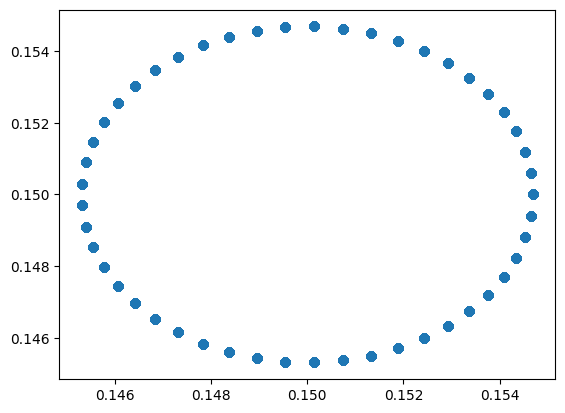

In [ ]:
plt.scatter(x_SRC, y_SRC, marker='o', alpha=0.5 )
plt.show()

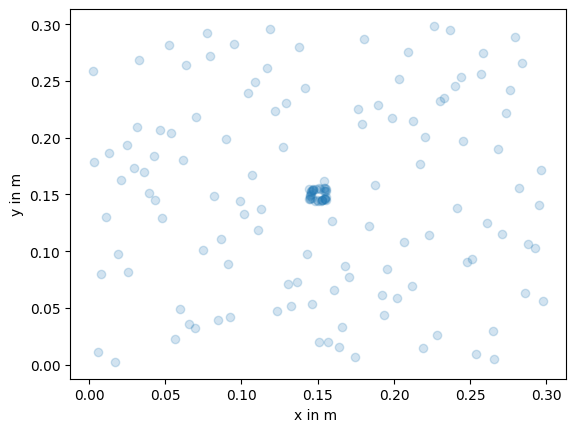

In [ ]:
plt.scatter(XYT_c[:, 0], XYT_c[:, 1], marker='o', alpha=0.2 )
plt.xlabel('x in m ')
plt.ylabel('y in m')
plt.show()

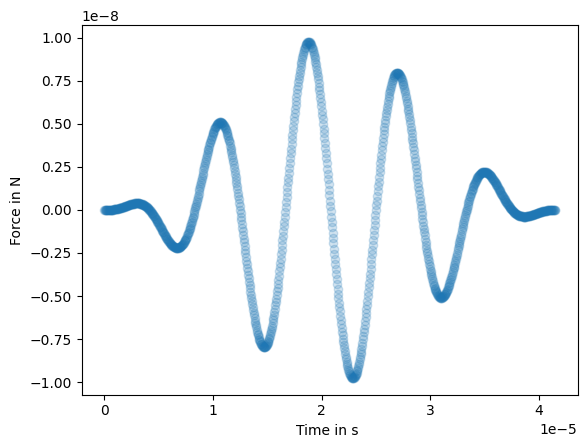

In [ ]:
plt.scatter(tt, sineburst, marker='o', alpha=0.2 )
plt.xlabel('Time in s ')
plt.ylabel('Force in N')
plt.show()